In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
# Para instalar seaborn si no está instalado
#pip install seaborn

# Para actualizar seaborn si tienen una versión anterior a 0.12.2
#pip install seaborn --upgrade

In [3]:
# Verificar que tengamos la version 0.12.2 o superior
sns.__version__

'0.13.2'

# Visualización

## Seaborn objects y la gramática de gráficos

Introducidos a finales de 2022, el nuevo sistema está basado el paradigma "Gramática de Gráficos" que utilizan otros paquetes como `ggplot2` de R.

No necesitamos recordar una docena de métodos para hacer gráficos, todo gráfico se hace mediante una única clase `Plot()`.

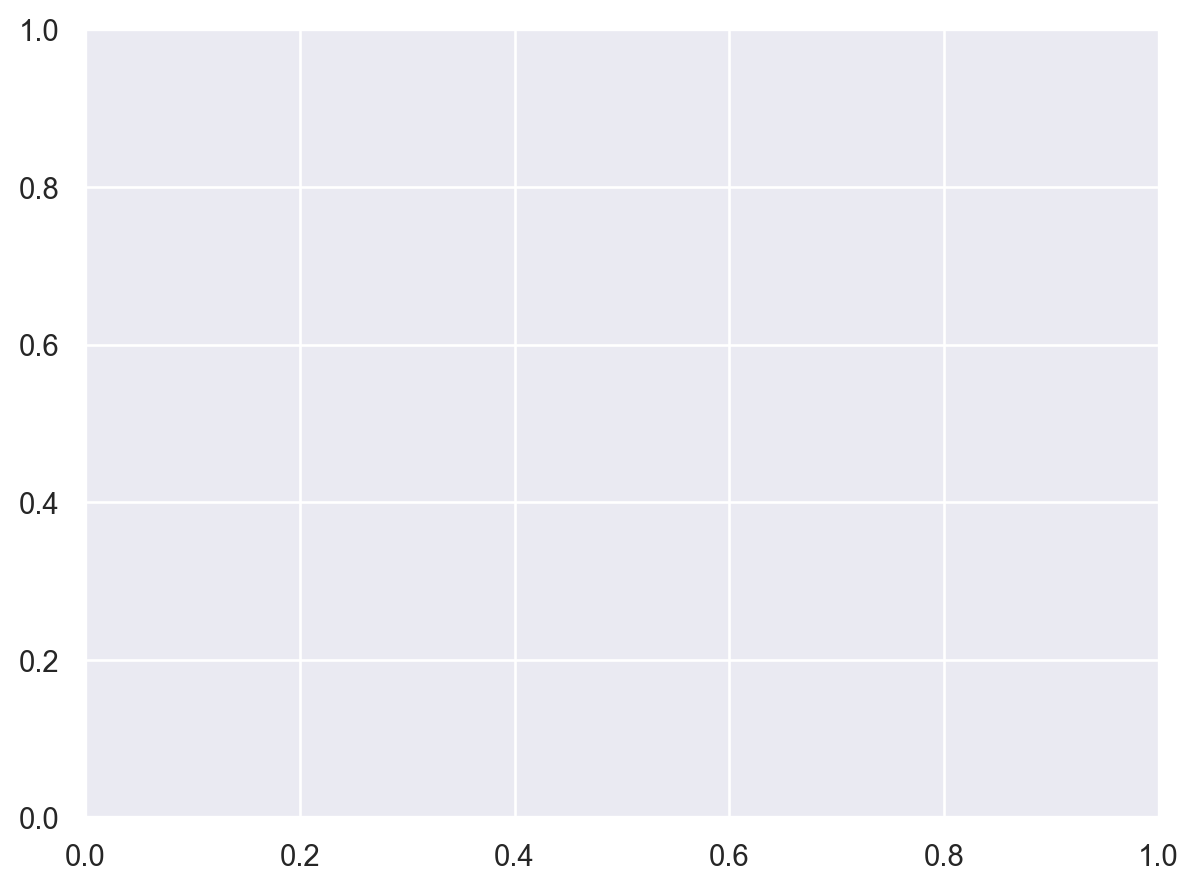

In [5]:
# Comenzamos con un gráfico vacío
so.Plot()

In [7]:
# Vamos a utilizar como primer ejemplo un dataset con el índice Dow Jones de las bolsas de Estados Unidos.
dowjones = sns.load_dataset("dowjones")
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


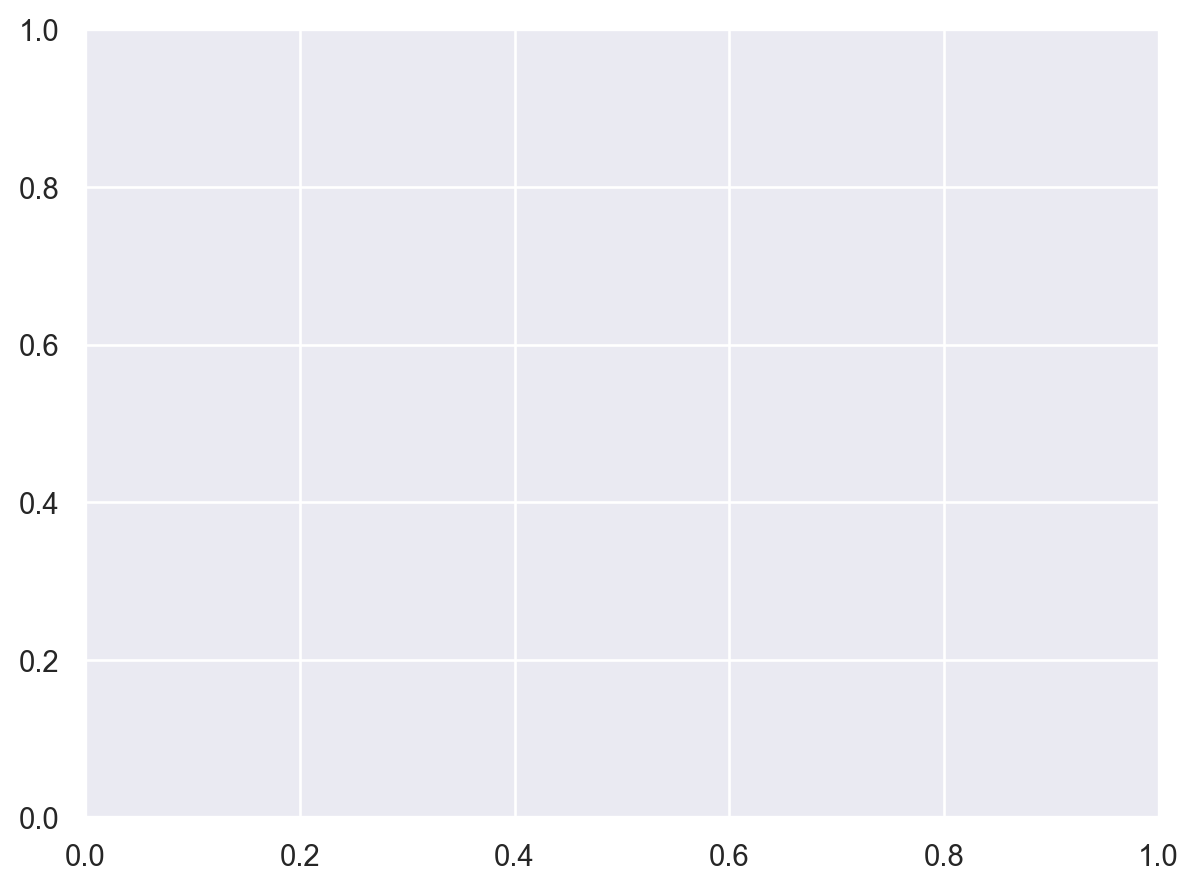

In [9]:
# Agregamos el conjunto de datos al Plot
so.Plot(data = dowjones)    # No se produce ningún cambio en el gráfico

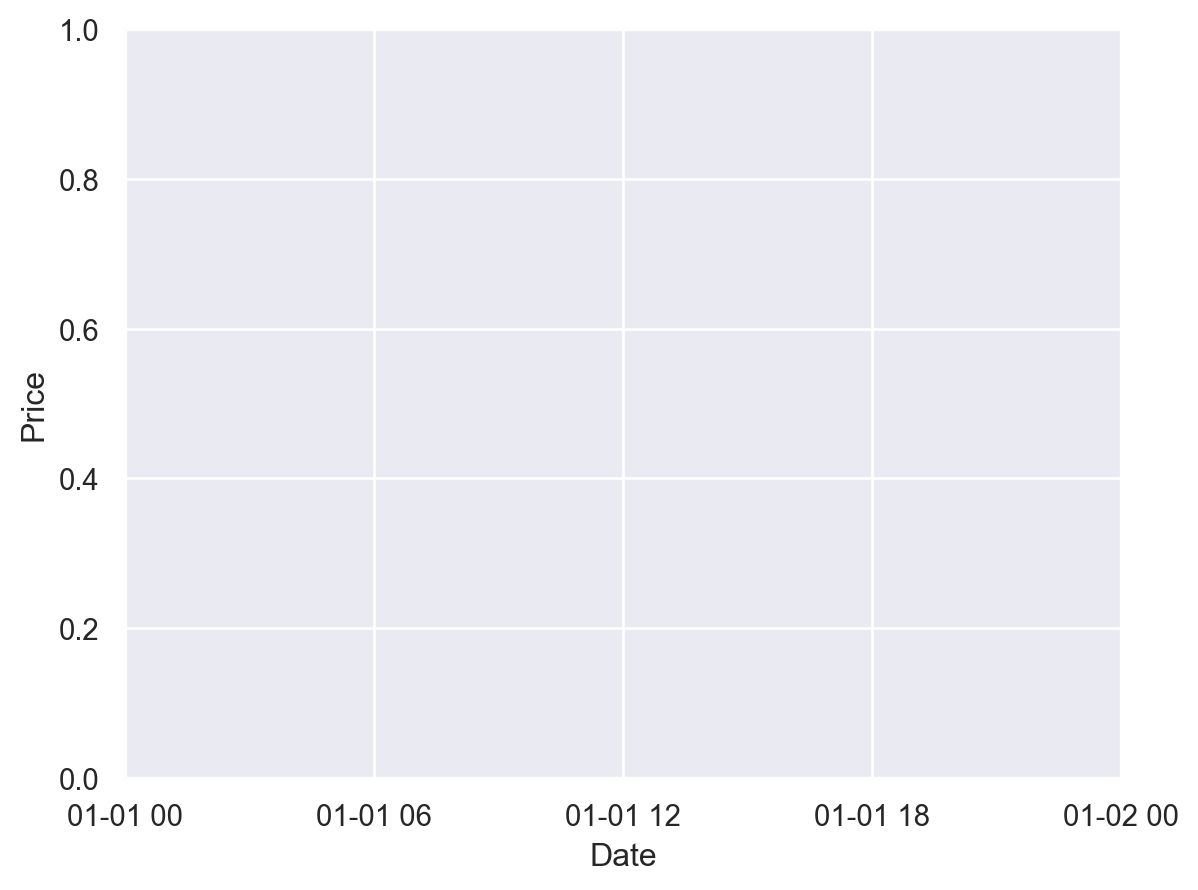

In [10]:
# Mapeamos la fecha al eje X y el precio al eje Y
so.Plot(data = dowjones, x = "Date", y = "Price")

### Gráfico de funciones

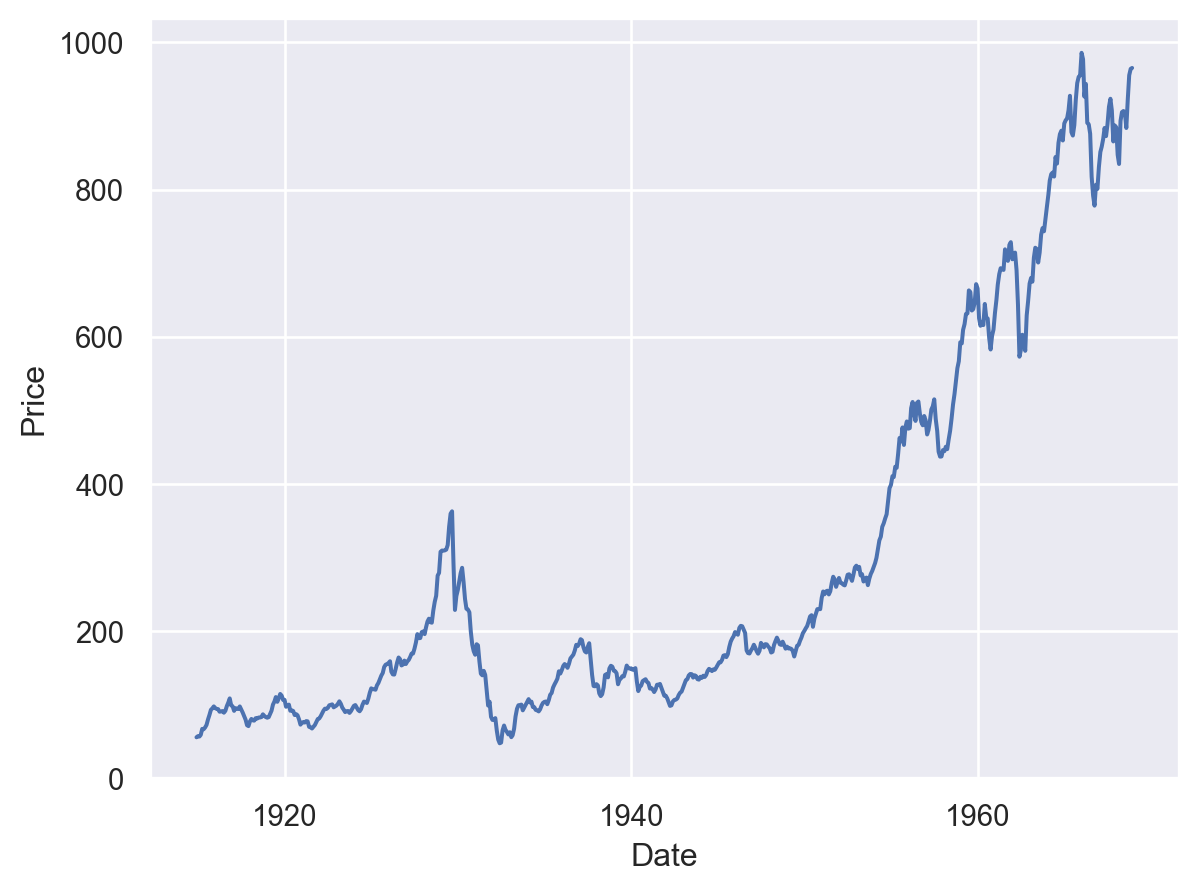

In [11]:
# Finalmente agregamos una marca, en este caso una curva.
# Usamos paréntesis para poder separar el comando en varias líneas y facilitar la lectura.
(
    so.Plot(data = dowjones, x = "Date", y = "Price")
    .add(so.Line())
)

### Gráfico de dispersión (scatter plot)
Utilizamos ahora una base de datos de propinas en restaurants.

Vamos a estudiar qué relación hay entre el valor de la cuenta y la propina que dejan los clientes.

In [13]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


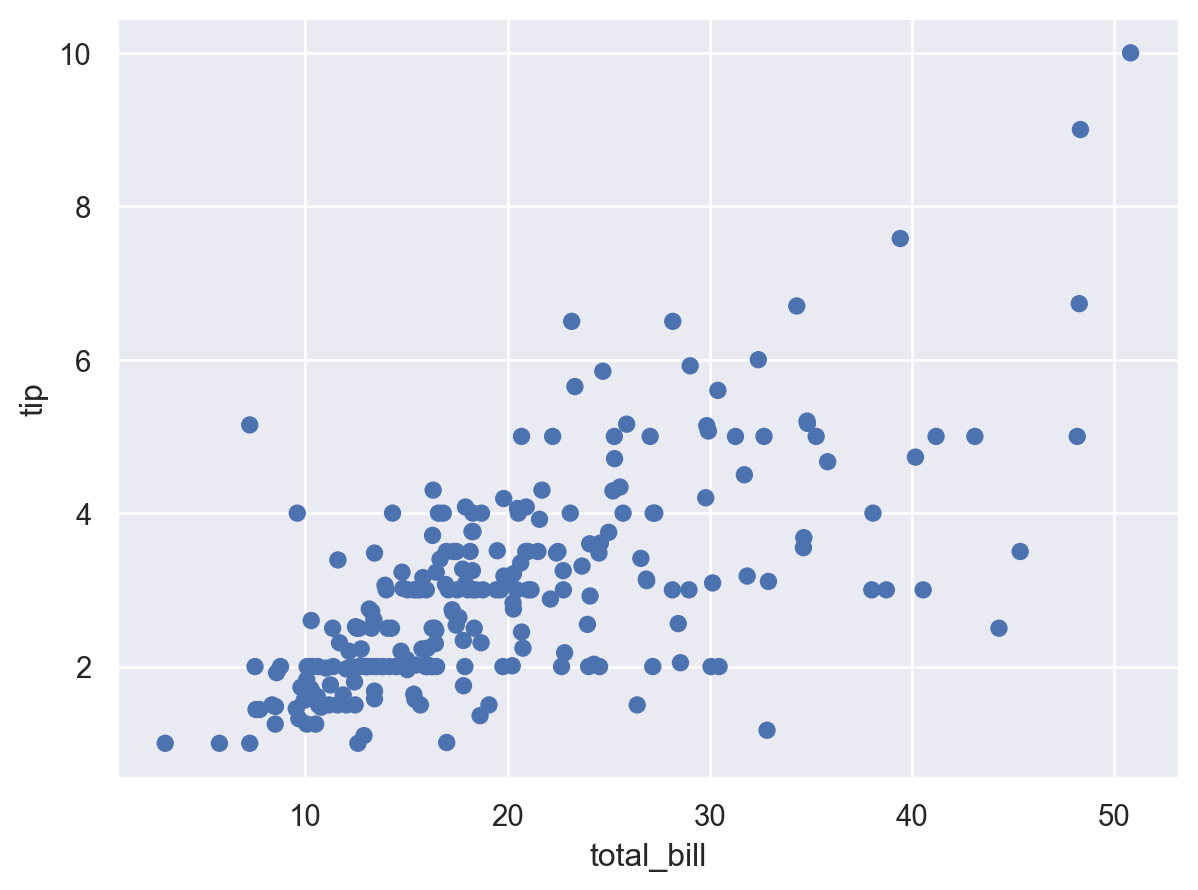

In [14]:
# Para usar puntos en vez de curvas, cambiamos la marca a Dot().
(
    so.Plot(data = tips, x = "total_bill", y = "tip")
    .add(so.Dot())
)


### Gráfico de curvas y puntos?
En algunos casos queremos superponer líneas y puntos.

Utilizamos ahora una base de datos de cantidad de pasajeros mensuales en una aerolínea.

In [15]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


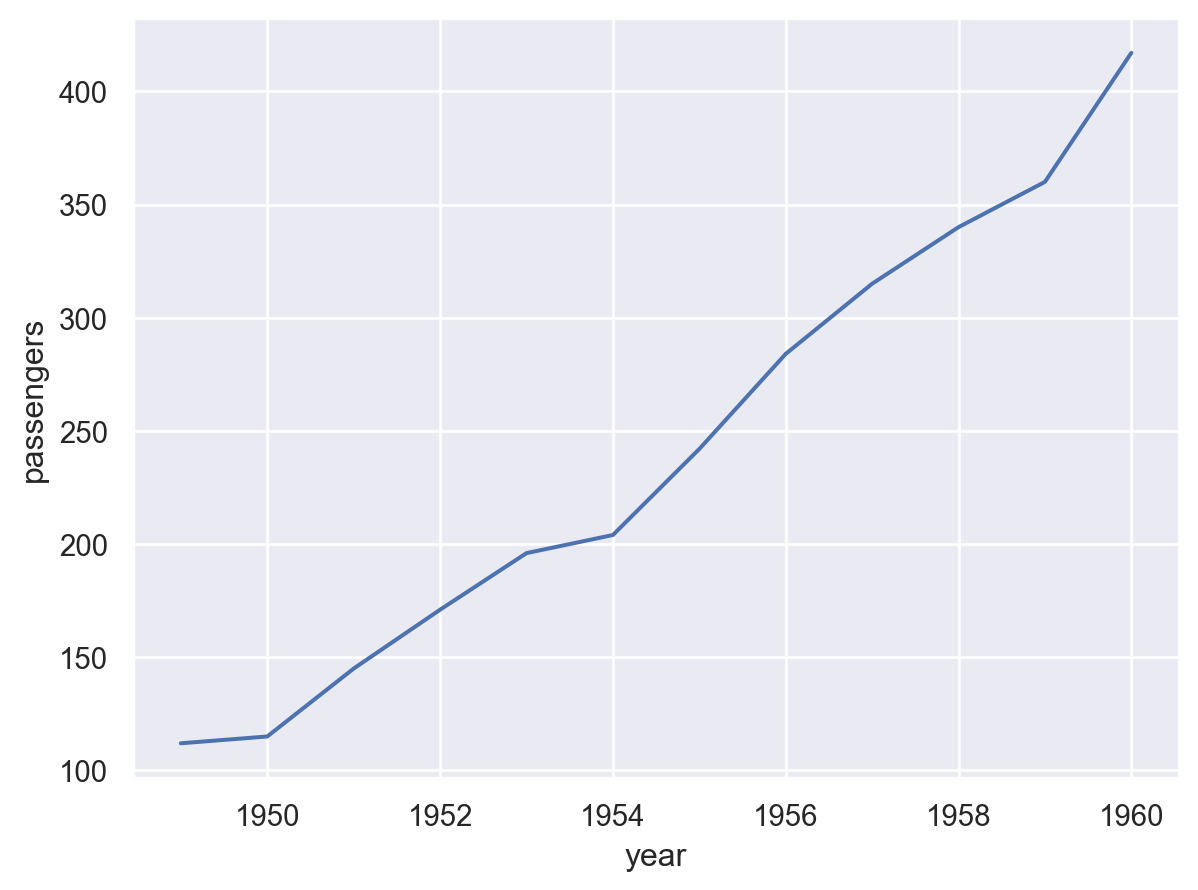

In [16]:
# Graficamos la curva cantidad de pasajeros en enero de cada año
vuelosEnero = flights[flights.month == "Jan"]
(
    so.Plot(data = vuelosEnero, x = "year", y = "passengers")
    .add(so.Line())
)

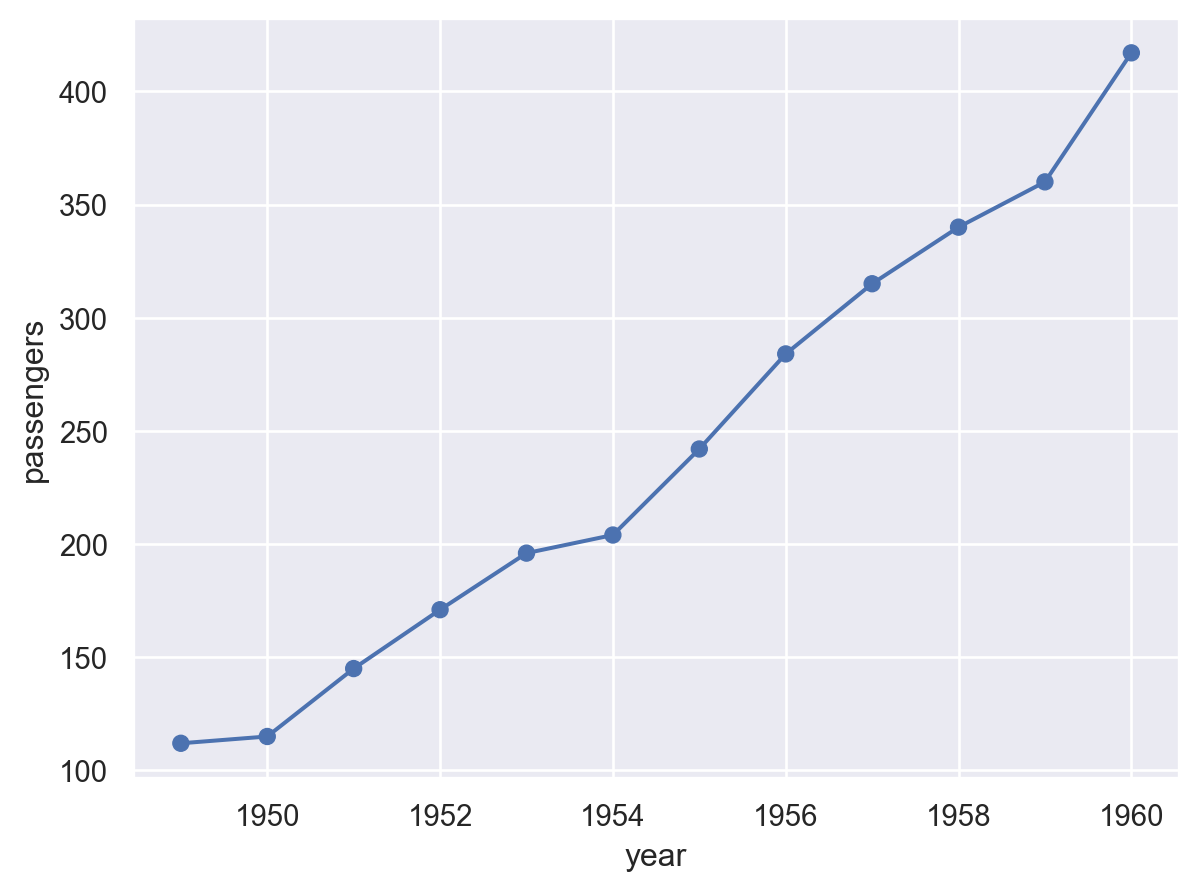

In [17]:
# Si queremos dibujar también los puntos correspondientes a cada dato...
(
    so.Plot(data = flights[flights.month == "Jan"], x = "year", y = "passengers")
    .add(so.Line())
    .add(so.Dot())
)

Podemos también fácilmente agregar datos (aggregate = agregar, juntar, resumir, ...)

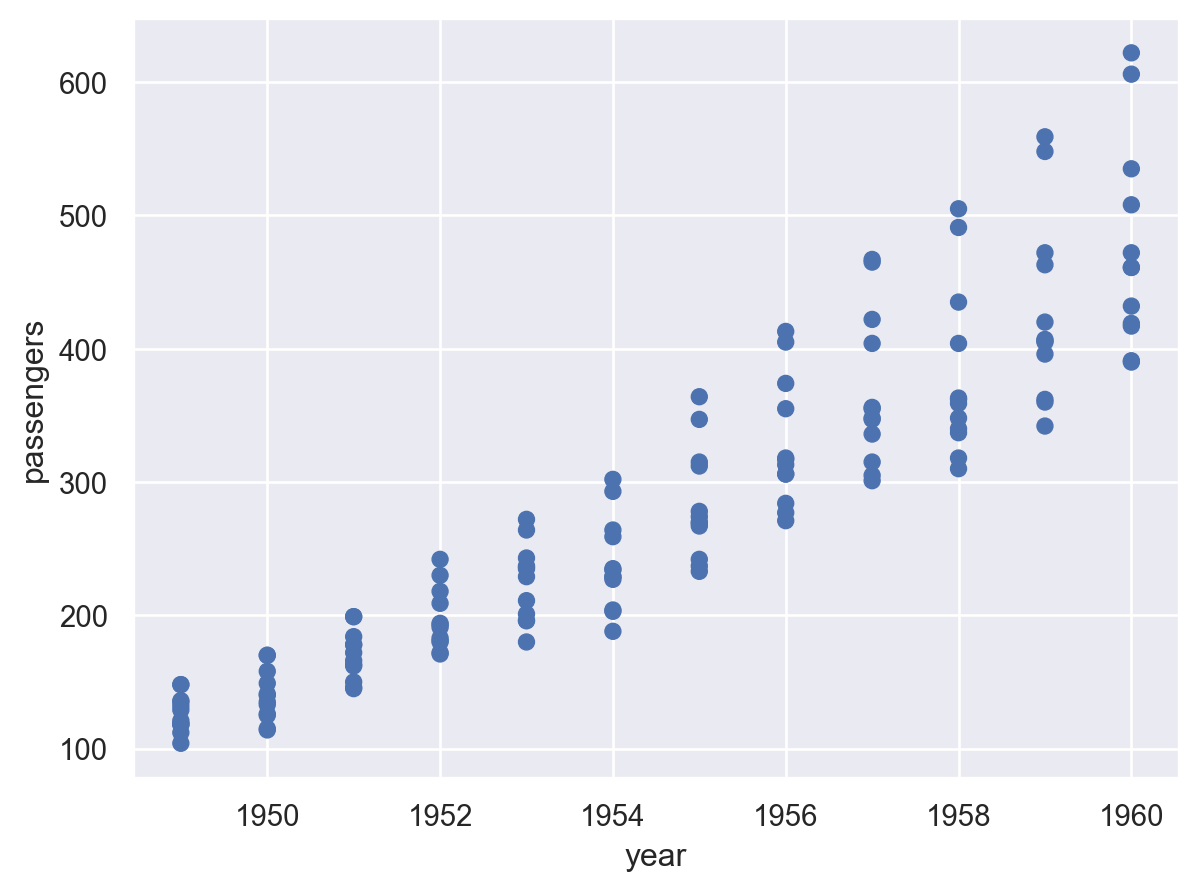

In [18]:
# Queremos considerar todos los meses. 
# Si sacamos el filtro...

(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot())
)

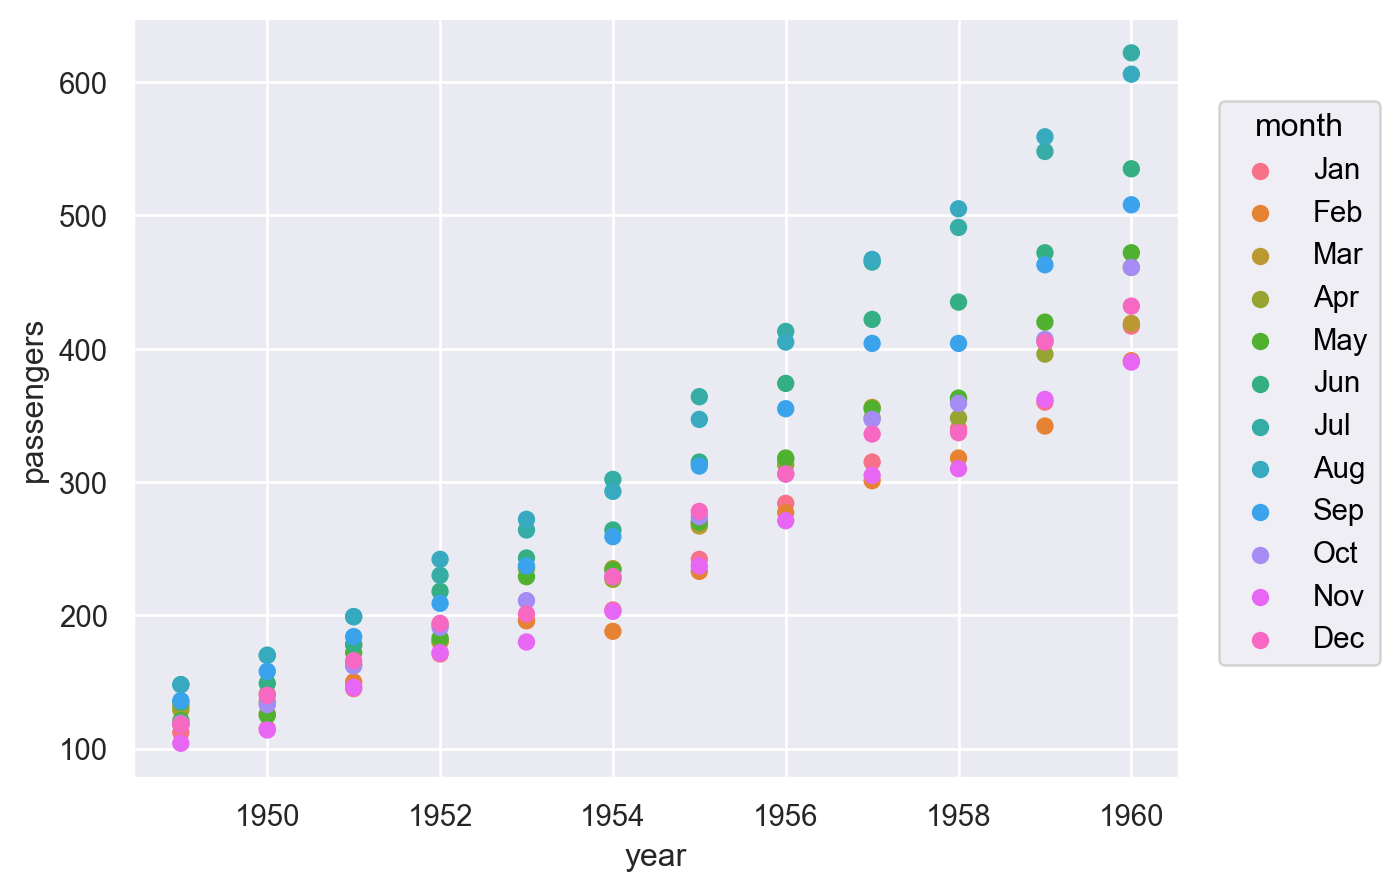

In [19]:
# Opción 1: utilizamos otro canal para codificar el mes
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Dot())
)

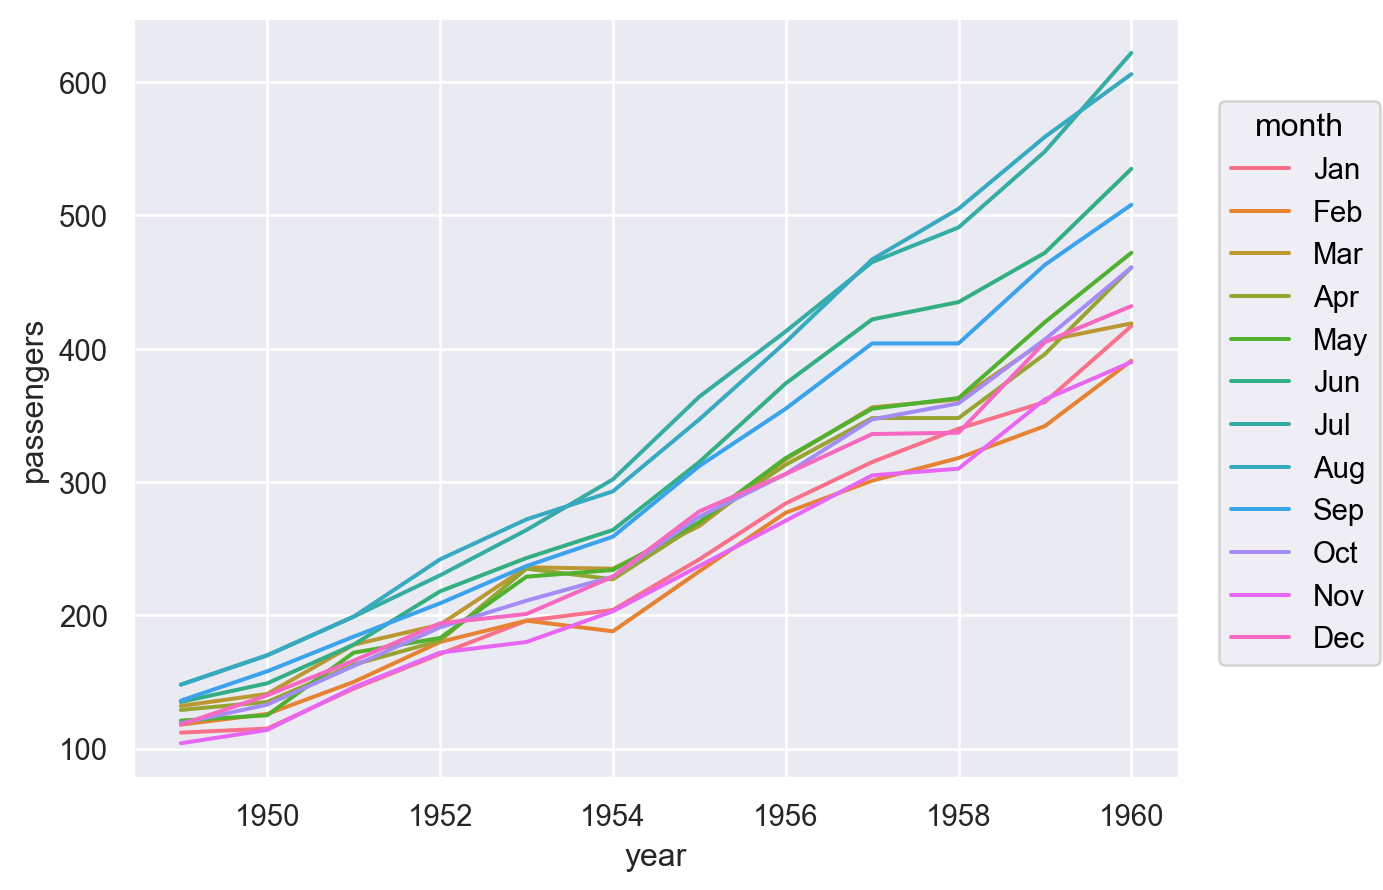

In [21]:
# Y si usamos líneas? En este caso, se agrupan automáticamente los valores por mes y se grafica una línea por mes 
# (es decir, color no solo pinta de color sino que también agrupa los datos según la variable indicada.
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
)

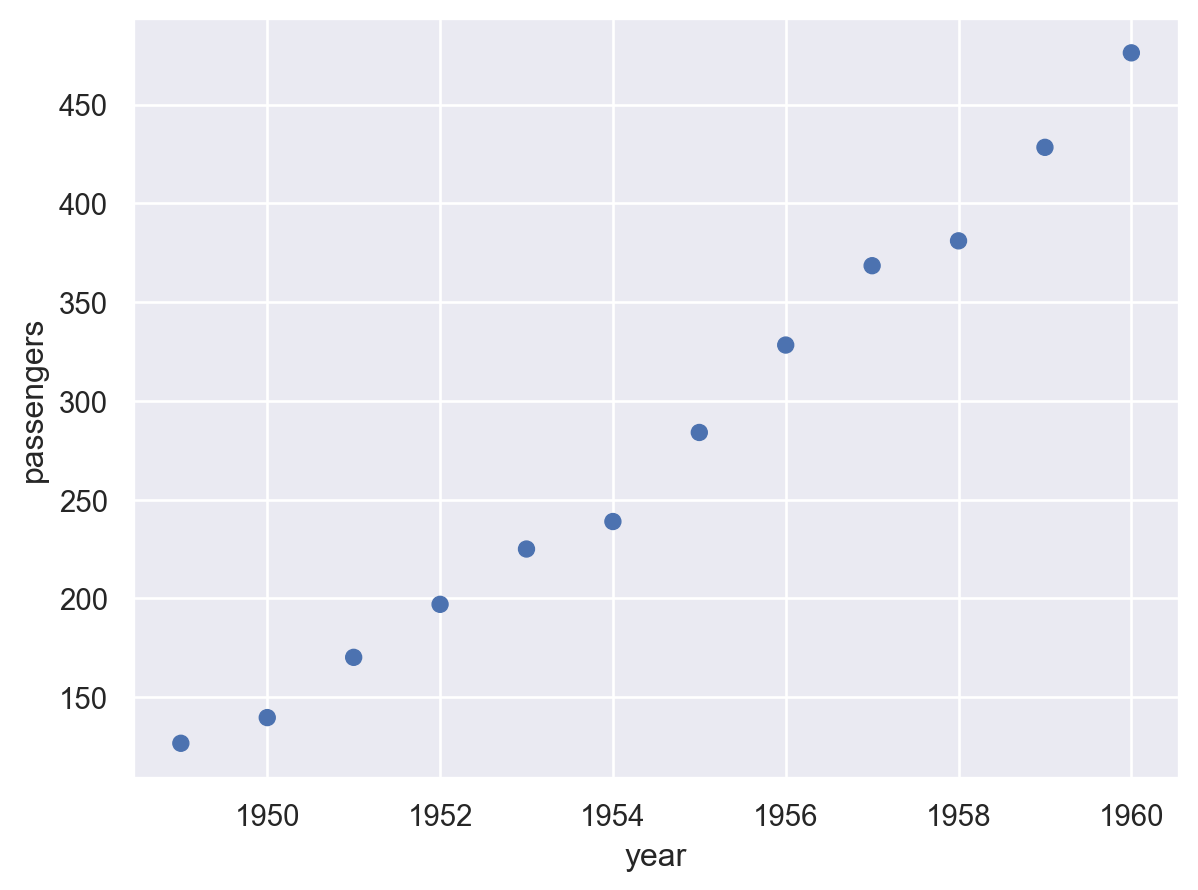

In [63]:
# Opción 2: agregamos los datos por mes
# Podemos calcularlos previamente utilizando lo que vimos en la práctica 2 (groupby(), sum(), ...)
# o usamos una función para agregar los datos.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg())  # Usamos .Agg para agregar los datos.
)

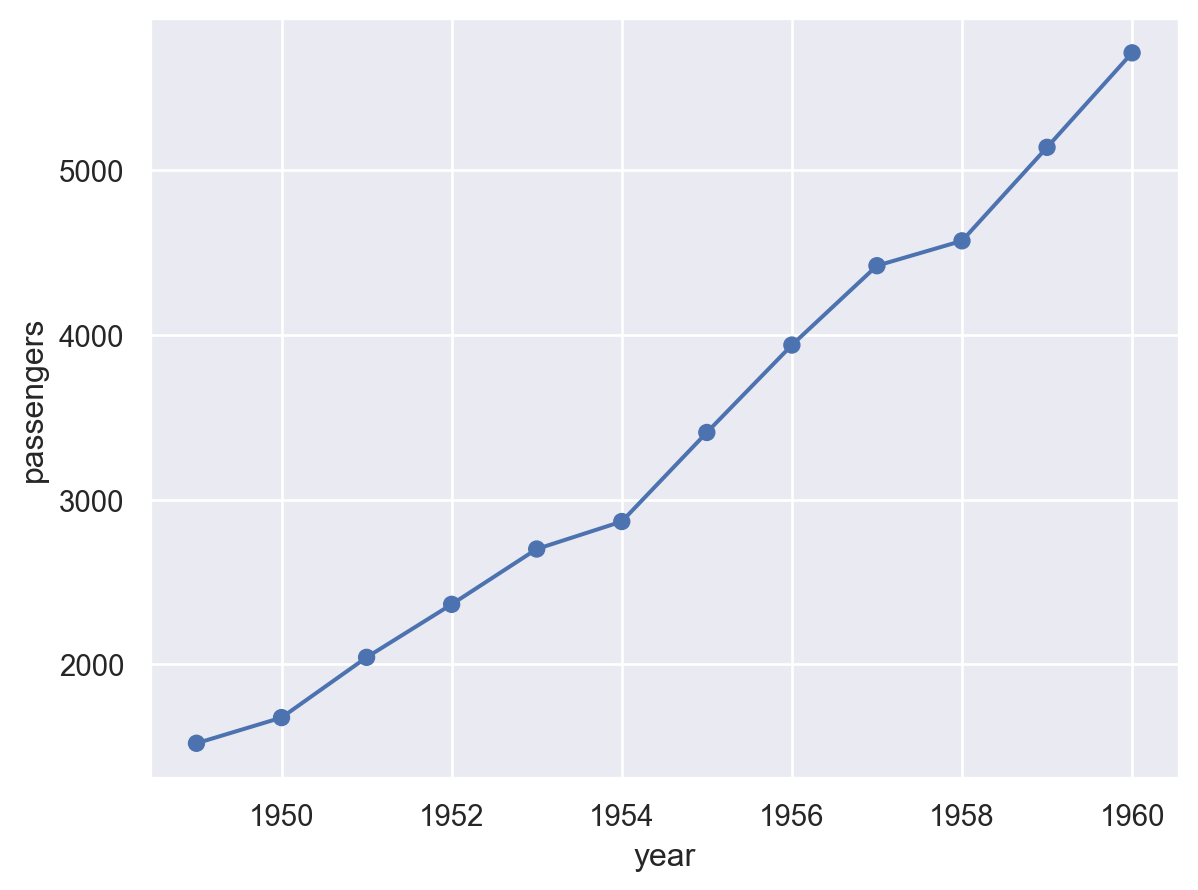

In [23]:
# Qué valores está graficando? Es la suma??
# Podemos indicar cualquier función de Pandas.Series para agregar los datos
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg("sum"))
    .add(so.Line(), so.Agg("sum"))
)

## Mapeo y asignación por capas

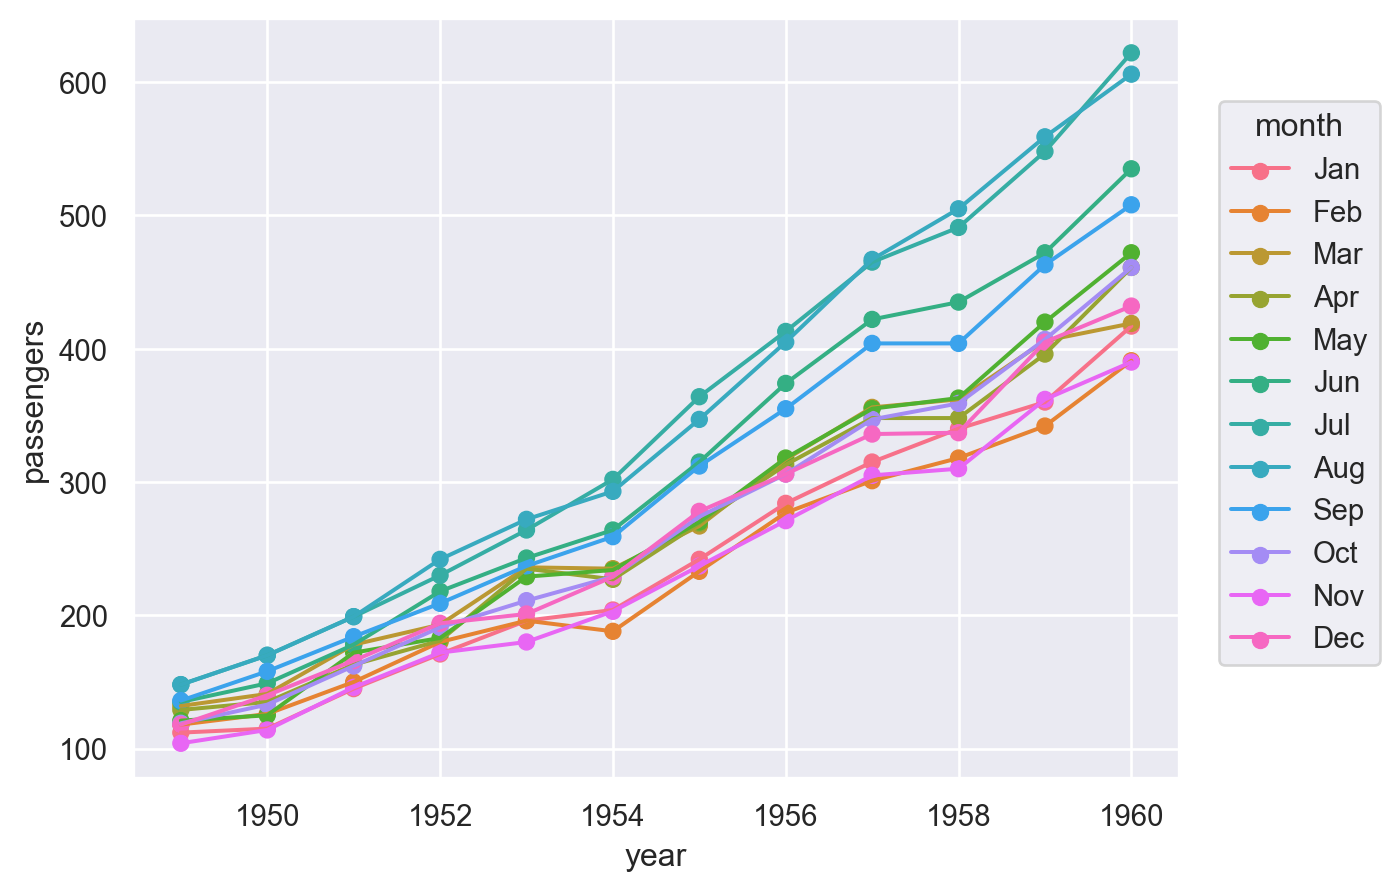

In [288]:
# Podemos asignar una codificación al definir el Plot() y esa codificación para a todas las capas.
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
    .add(so.Dot())
)

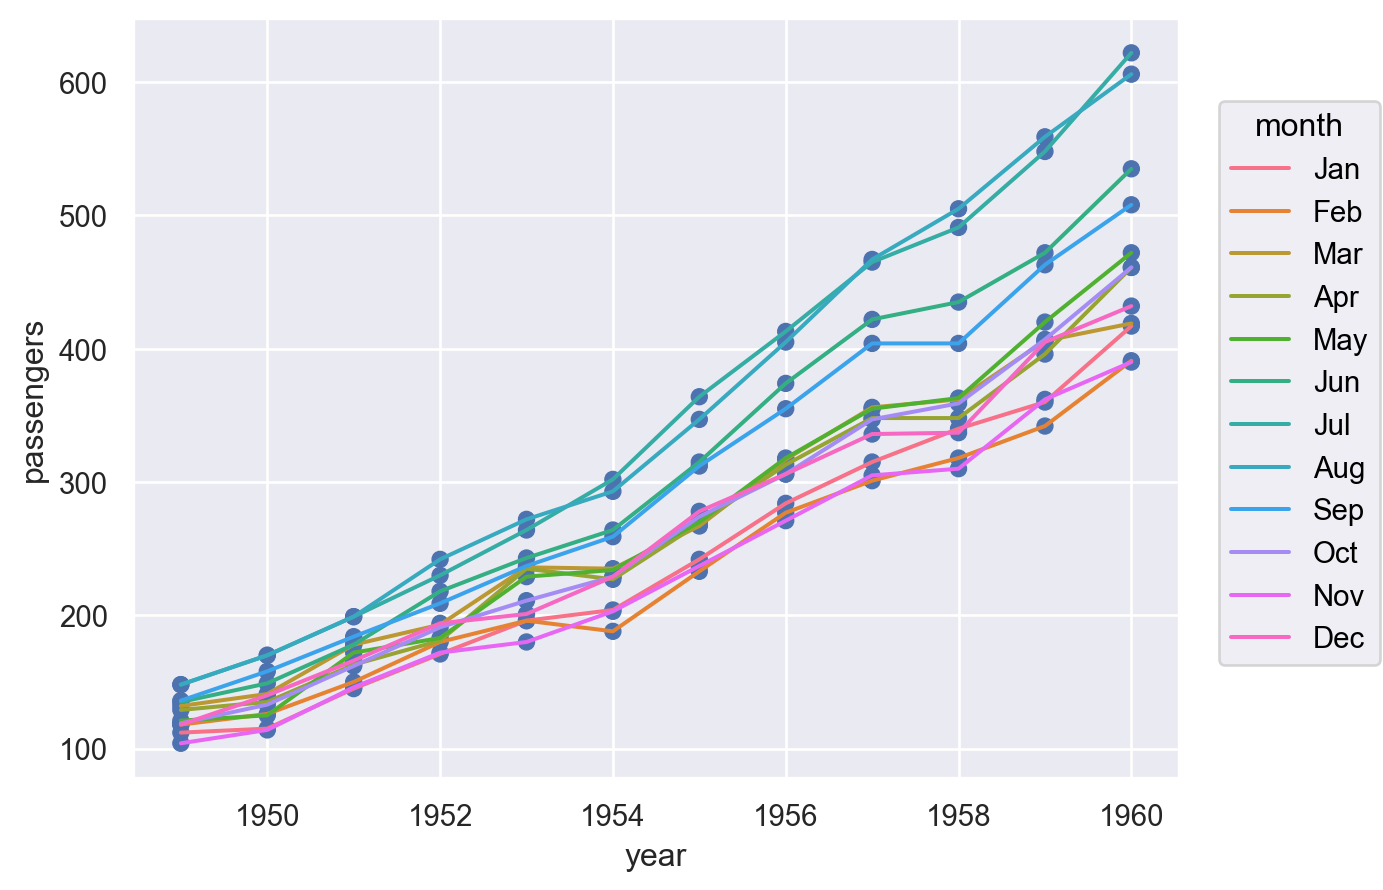

In [24]:
# O podemos asignar una codificación al agregar una marca y esa codificación se aplica solo en esa capa.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot())
)

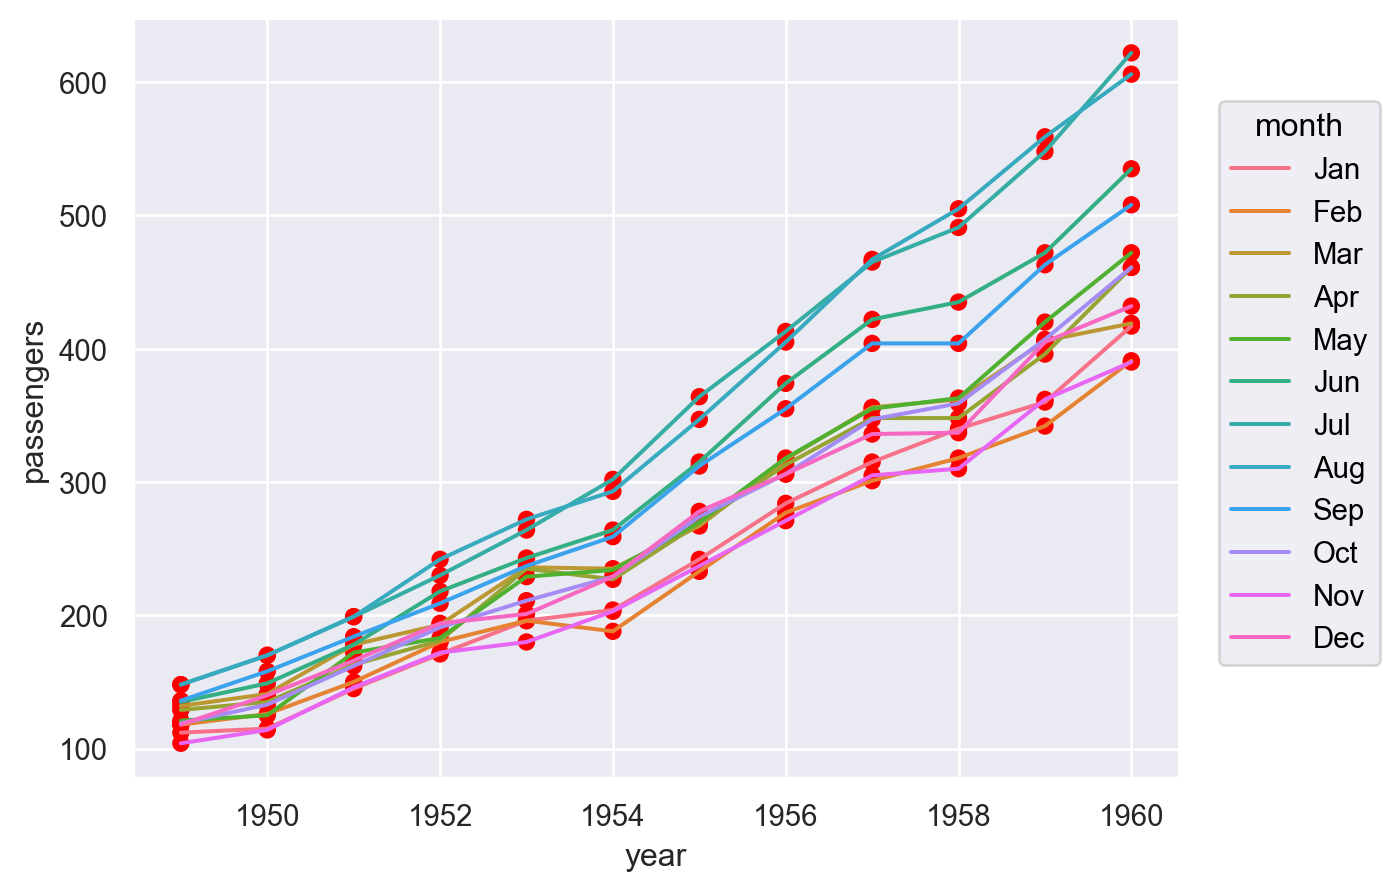

In [25]:
# Si asignamos un pámatetro a la marca Dot() u otra marca,
# no estamos codificando datos sino que asignamos el valor directamente.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot(color = "red"))
)


**Ejercicio** ¿Que pasa si hacemos `.add(so.Dot(color = "month"))`?

¿Y si hacemos `so.Plot(data = flights, x = "year", y = "passengers", color = "red")`?

La codificación de datos en las coordenadas x e y de las marcas también podemos indicarlas en las capas y codificar distintos datos en distintas capas.

In [ ]:
# Si queremos comparar la cantidad promedio de vuelos con la cantidad de vuelos en enero...
pasajerosEnero = flights[flights["month"] == "Jan"]["passengers"]
display(pasajerosEnero)
(
    so.Plot(data = flights, x = "year")
    .add(so.Line(), so.Agg("mean"), y = "passengers") # Promedio anual de pasajeros por mes
    .add(so.Line(color = "red"), y = pasajerosEnero) # Pasajeros en enero
)

Si utilizamos una palabra entre comillas para algún canal, se interpreta como una variable del dataframe. 
Si lo hacemos sin comillas se interpreta como una variable fuera del DataFrame, podemos usar por ejemplo arrays de numpy o series de pandas.

## Gráficos de barras

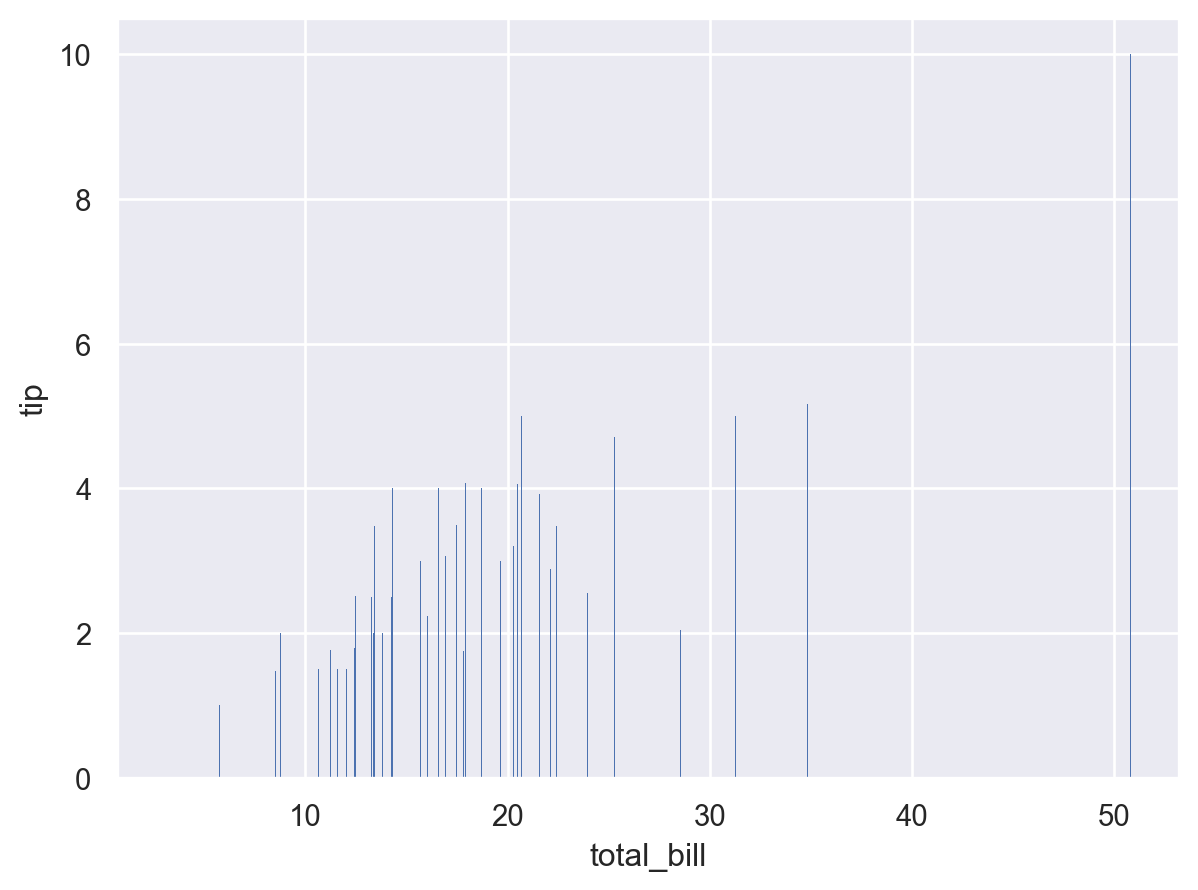

In [291]:
# Qué hace la marca "barras" (Bars)? 
tips = sns.load_dataset("tips")
(
    so.Plot(tips, "total_bill", "tip")
    .add(so.Bar())
)

En el anterior caso no es una buena visualización.

Probamos un ejemplo más sencillo

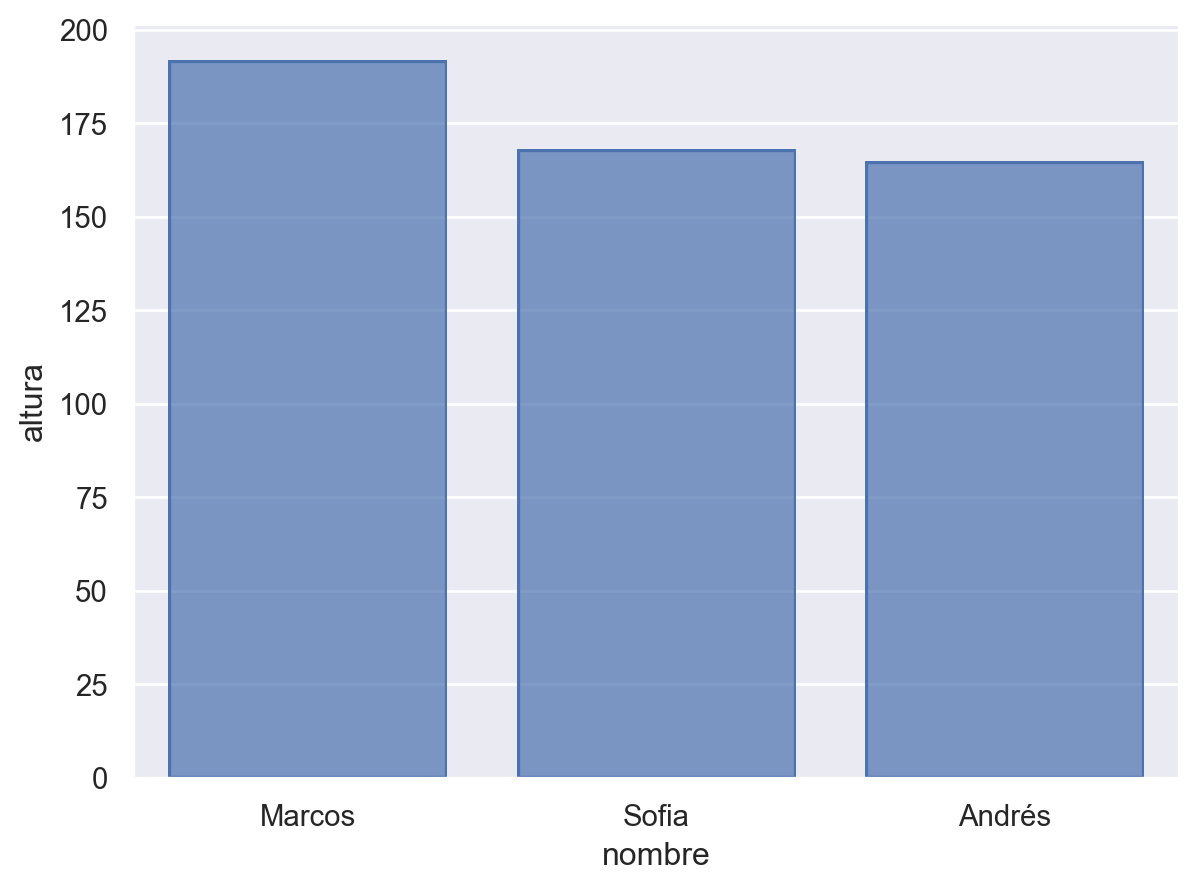

In [292]:
personas = pd.DataFrame({'nombre':['Marcos', 'Sofia', 'Andrés'], 'altura':[192, 168,165]})
(
    so.Plot(personas, "nombre", "altura")
    .add(so.Bar())
)

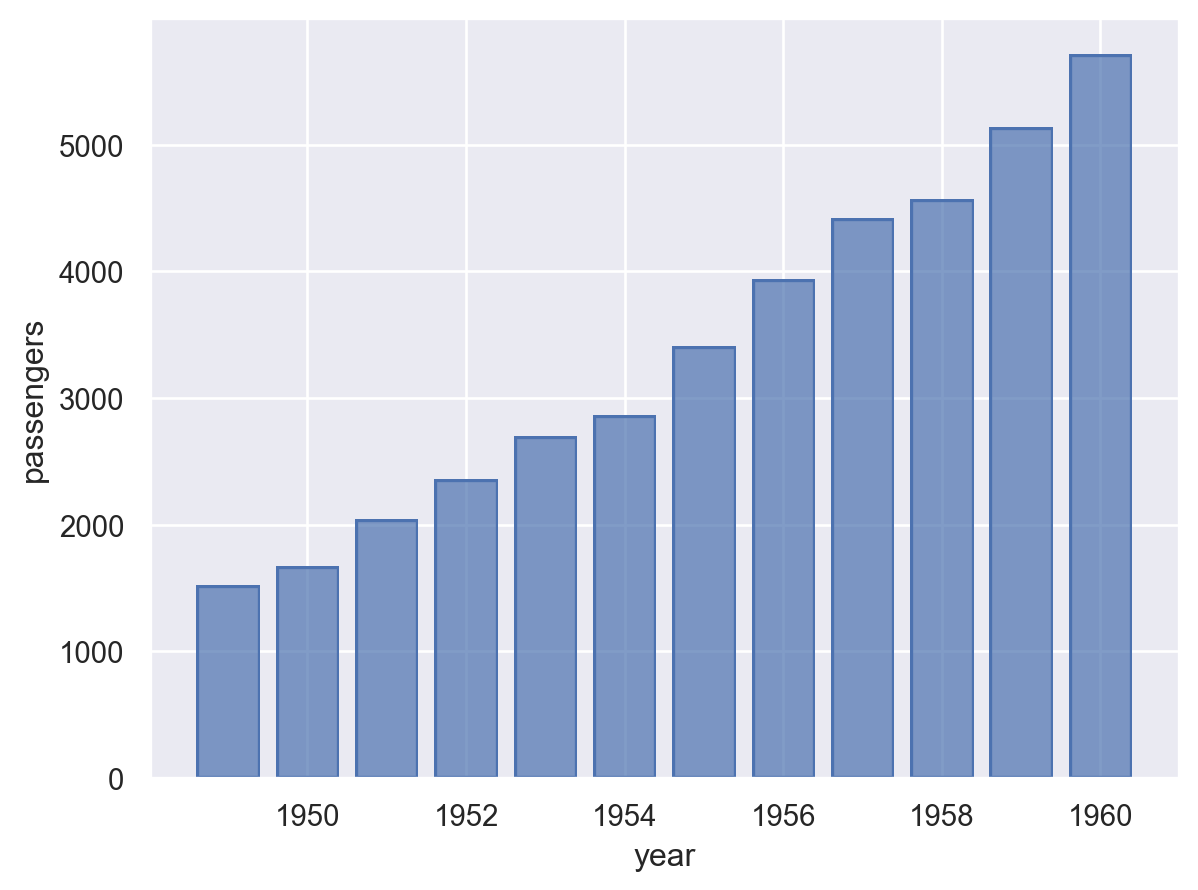

In [293]:
# La variable x puede también corresponder a valores numéricos discretos.
# Graficamos la cantidad total de vuelos por año.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Bar(), so.Agg("sum"))
)

## Histogramas
El último gráfico de barras podemos pensarlo como un histograma, vemos la cantidad de pasajero en función del año.
En ese caso las cantidades por mes ya estaban calculadas y solo las sumamos.

Cuando tenemos todos los datos individuales, podemos agregarlos para hacer un gráfico de barras usando el método `hist`.

In [27]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Histograma de una variable categórica

Tenemos una base de datos con información de píngüinos y queremos saber cuántos pingüinos hay en cada isla.

In [31]:
# Podemos contarlos primero usando funciones de Pandas...
#pinguinos_por_isla = ???  ## EJERCICIO
#display(pinguinos_por_isla)

# Lo hacemos a mano para no resolver el ejercicio.
islas = ['Biscoe', 'Dream', 'Torgersen']
poblacion = [168, 124, 52]
pinguinos_por_isla = pd.Series(poblacion, index=islas)
type(pinguinos_por_isla)

pandas.core.series.Series

In [32]:
pinguinos_por_isla.name = "poblacion"
pinguinos_por_isla.index.name = "isla"
display(pinguinos_por_isla)

isla
Biscoe       168
Dream        124
Torgersen     52
Name: poblacion, dtype: int64

In [30]:
# Esto no funciona, no podemos usar una series de Pandas como data
(
    so.Plot(data = pinguinos_por_isla, x = "isla", y = "poblacion")
    .add(so.Bar())
)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

**Pregunta:** ¿Podemos usar so.Plot() sin un DataFrame?

Sí, no necesariamente tenemos que indicar data, x e y al definir el Plot().

Podemos usar series de Pandas o arrays para x e y.

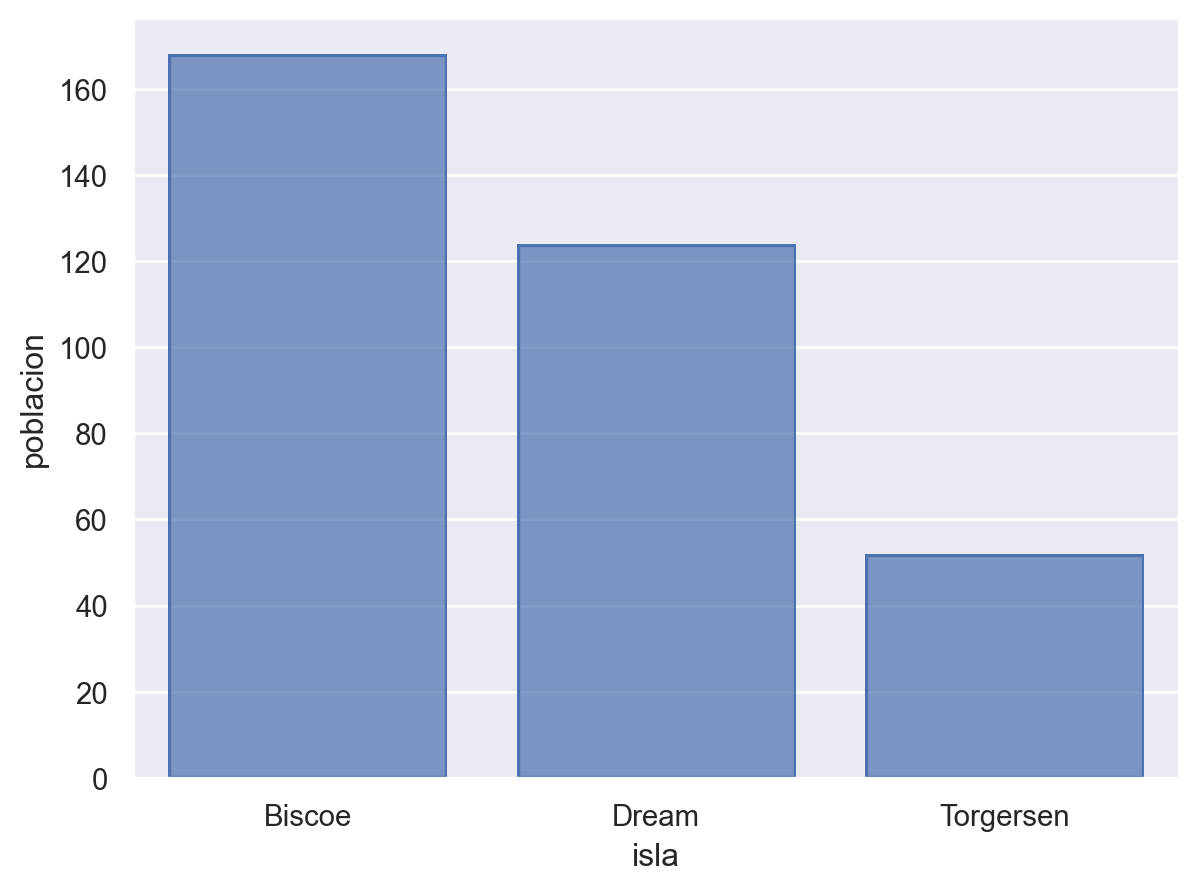

In [33]:
# Pero podemos indicar series para x e y, y no especificar ninguna DataFrame
(
    so.Plot(x = pinguinos_por_isla.index, y = pinguinos_por_isla)
    .add(so.Bar())
)

### Histogramas usando `so.Hist()`
Ahora usamos las funciones de so.Plot() para agregar los datos y realizar el histograma.

No necesitamos nosotros contar "a mano" cuántos pingüinos hay en cada isla.

In [37]:
# Repasamos los datos
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [38]:
# La variable "island" es una variable categórica, con tres valores distintos.
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

Contamos cuántas veces se repite cada uno de los tres valores.

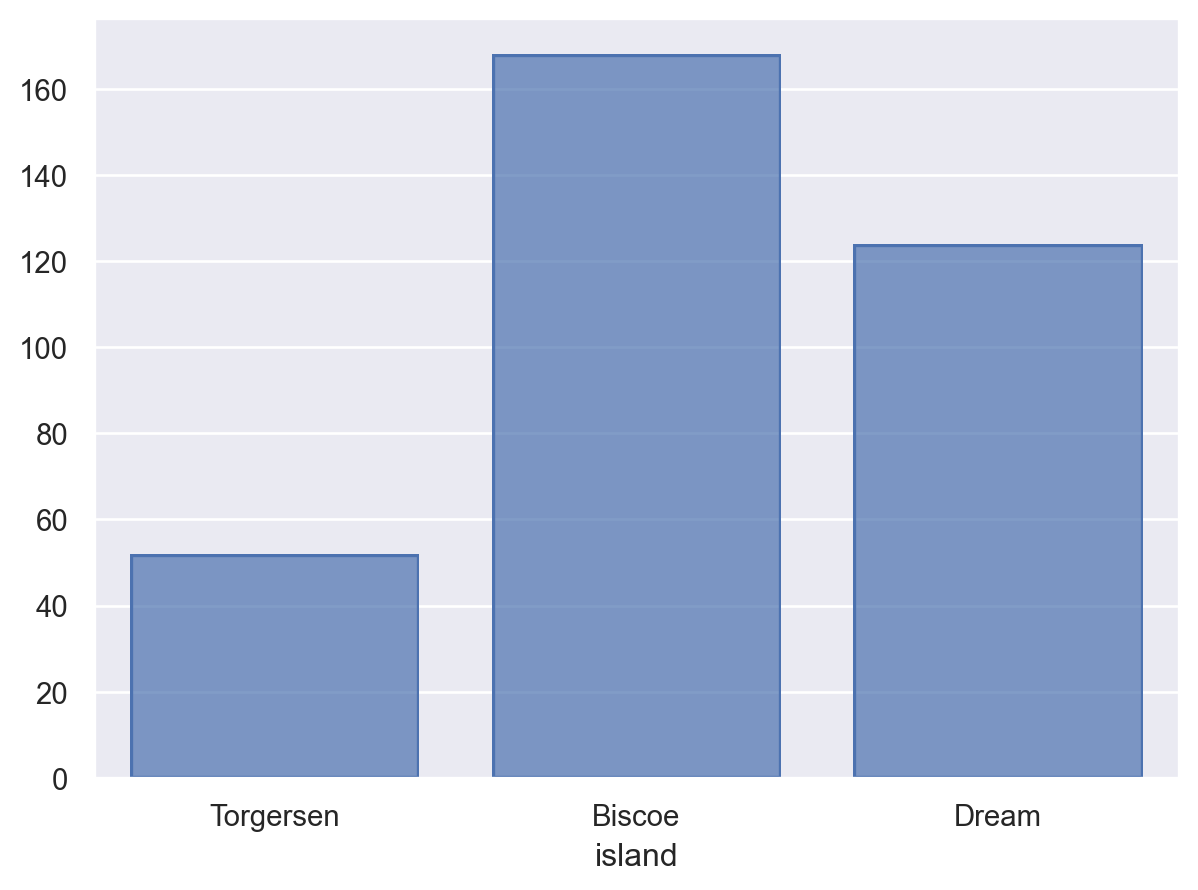

In [39]:
# Hay que asignar una variable y?
(
    so.Plot(data = penguins, x = "island")
    .add(so.Bar(), so.Hist())
)

### Histograma de una variable numérica

**Ejercicio.** Realizar en el cuaderno un histograma de cuatro barras para los siguientes datos:
$$
edades = \{20,28,18,10,50,55,70,75,80,76,82\}
$$

Verificar el gráfico en Python.


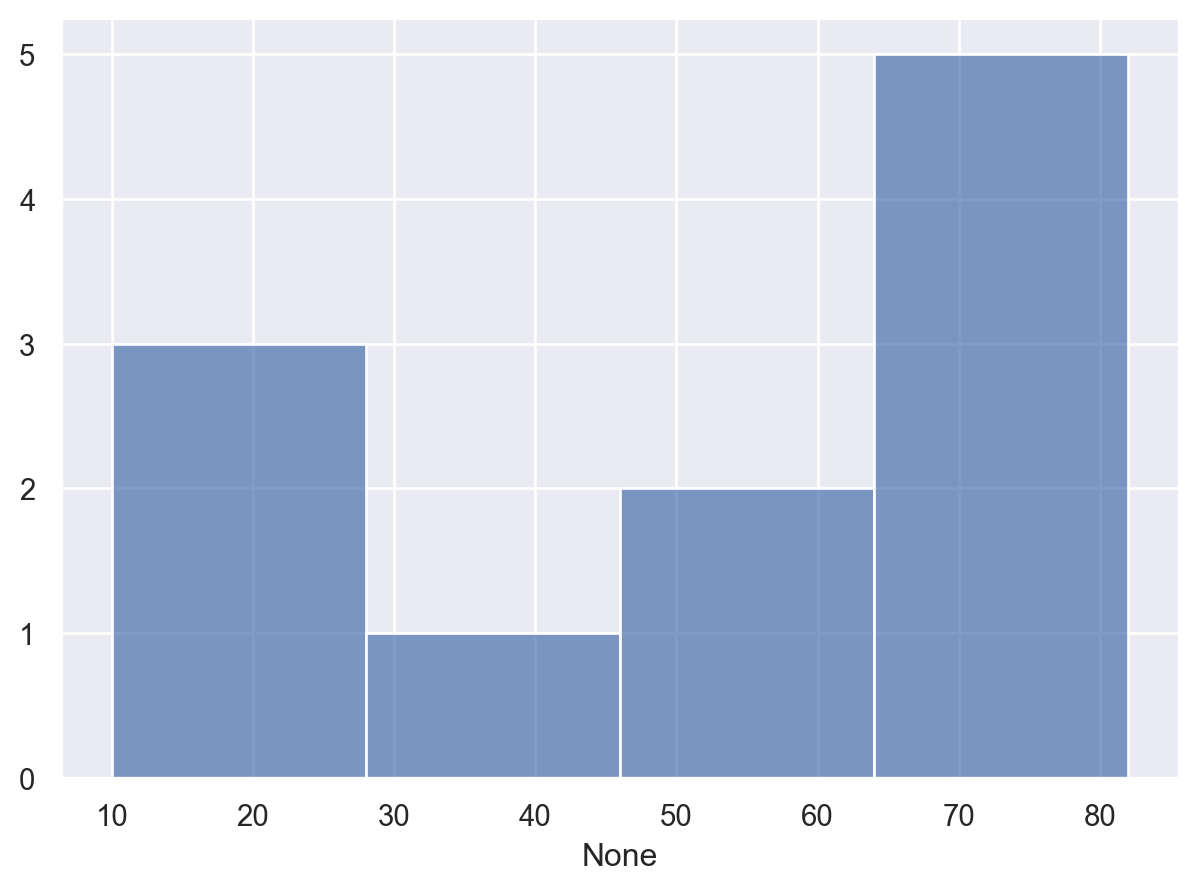

In [308]:
edades = pd.Series([20,28,18,10,50,55,70,75,80,76,82])
(
    so.Plot(x = edades)
    .add(so.Bar(), so.Hist(bins = 4))
)

Para histogramas de una variable continua es más común que no haya tanto espacio entre las barras.

Para eso usamos `Bars` en lugar de `Bar`.

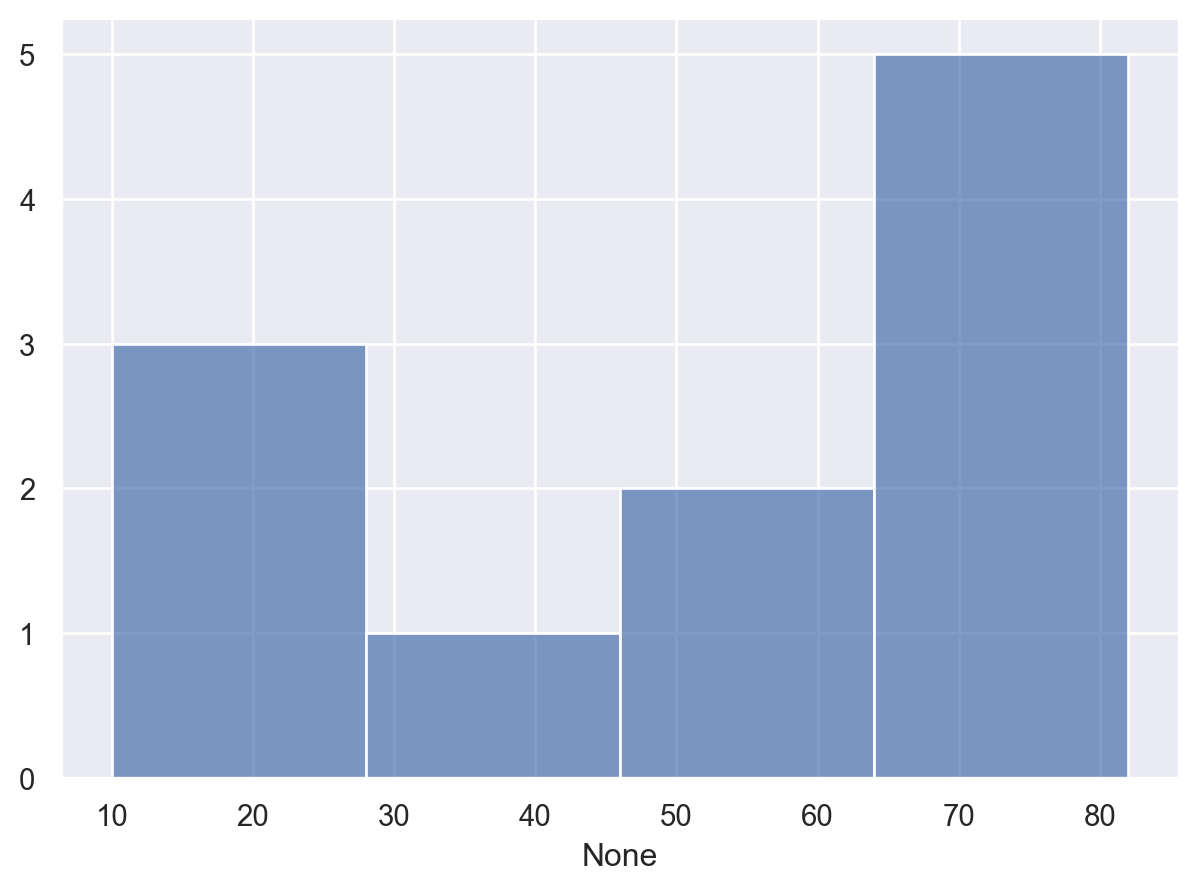

In [41]:
edades = pd.Series([20,28,18,10,50,55,70,75,80,76,82])
(
    so.Plot(x = edades)
    .add(so.Bars(), so.Hist(bins = 4))
)

### Histrogramas y distribución de una variable

Los histogramas nos sirven para analizar la distribución de valores observados de una variable.

**Ejemplo:** ¿Cuánto pesa un pingüino?

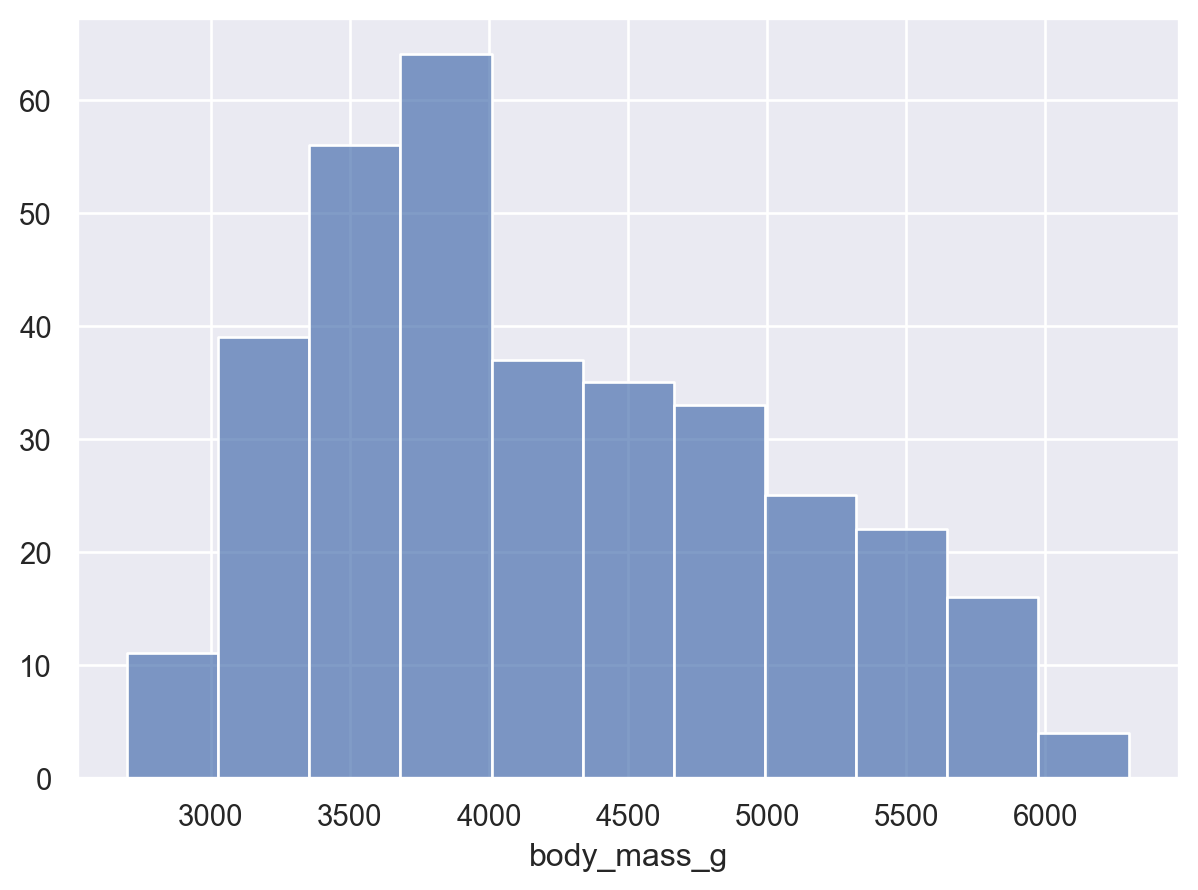

In [44]:
# Queremos ver cuántos pingüinos hay en distintos rangos de peso.
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist())
)

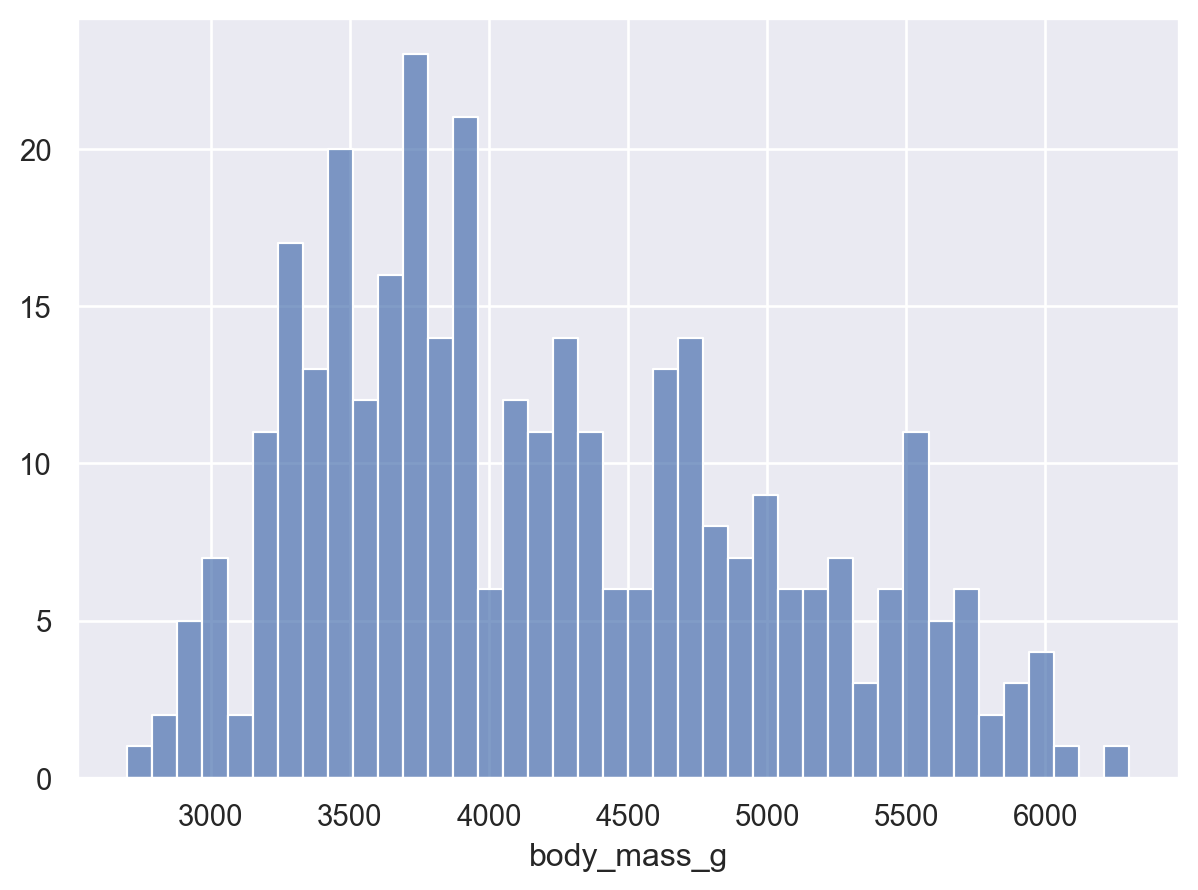

In [311]:
# Podemos cambiar la cantidad de intervalos. 
# Si tomamos muy pocos intervalos no vamos a poder distinguir los valores.
# Si tomamos muchos intervalos, van a quedar muy desagregados y será difícil comparar distintos intervalos.
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist(bins = 40))
)

## Box plot

### Ejercicio
Realizar en el cuaderno un grafico boxplot para los siguientes datos:
$$
respuestas = \{10, 15, 20, 24, 30, 50, 54, 60, 62, 70, 100, 105\}
$$

Verificar el gráfico en Python.

En Seaborn Objects no tenemos la opción de realizar box plots. Podemos hacerlos utilizando `seaborn.boxplot()`. Los parámetros a pasar son similares.


In [47]:
respuestas = pd.Series([10, 15, 20, 24, 30, 50, 54, 60, 62, 70, 100, 105])

# Verificamos primero el cálculo de cuartiles
display(respuestas.quantile(.25, interpolation = "midpoint"))  # Primer cuantil
display(respuestas.quantile(.50))   # Segundo cuantil
display(respuestas.quantile(.75, interpolation = "midpoint"))  # Tercer cuantil

22.0

52.0

66.0

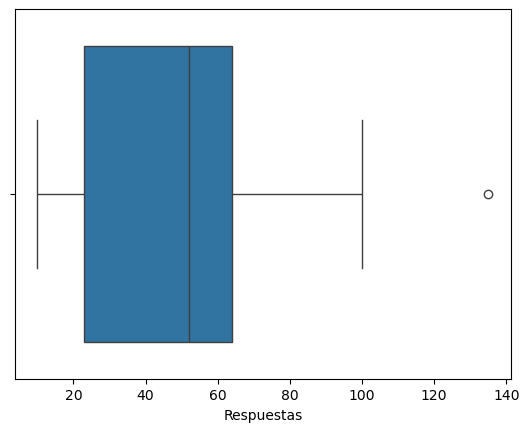

In [56]:
# Ahora realizamos el boxplot
(
    sns.boxplot(x = respuestas)
    .set(xlabel='Respuestas')
)
plt.show()

### Ejercicio.
A partir de qué valor la última respuesta (105) pasaría a ser outlier en el gráfico?

Verificarlo en Python.

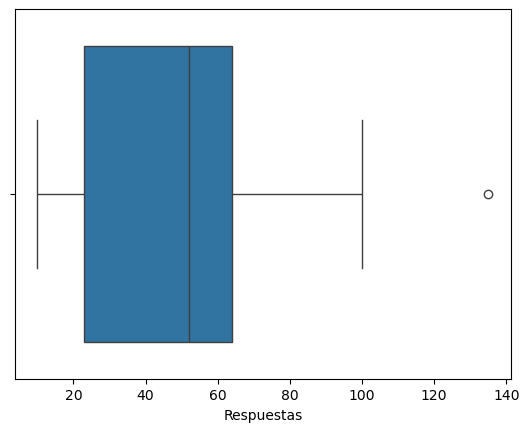

In [59]:
respuestas = pd.Series([10, 15, 20, 24, 30, 50, 54, 60, 62, 70, 100, 135])
respuestas.name = "Respuestas"
sns.boxplot(x = respuestas)
plt.show()

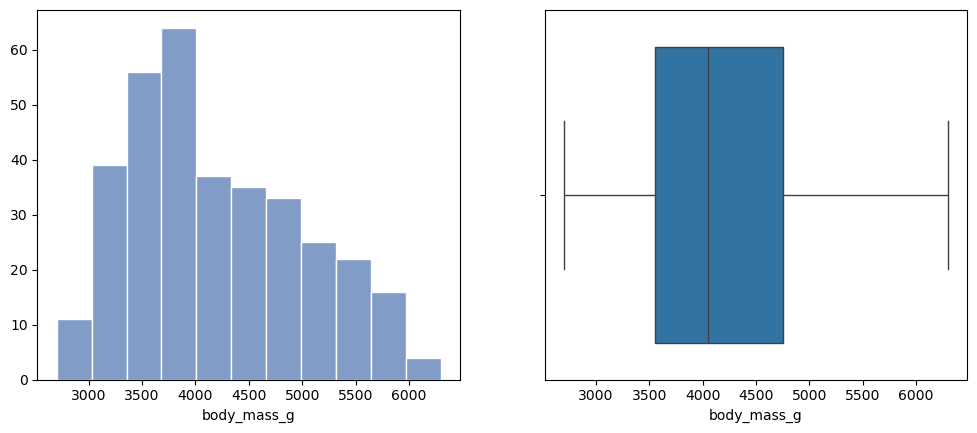

In [60]:
# Los mismos datos del histograma anterior del peso de los pingüinos, 
# podemos representarlos en un BoxPlot
fig, ax =plt.subplots(1,2)  # Utilizamos este código para crear una grilla de dos gráficos.
fig.set_figwidth(12)
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist())
    .on(ax[0]).plot()  # Colocamos el histograma en la primera casilla de la grilla.
)
sns.boxplot(penguins, x="body_mass_g", ax = ax[1])    # Colocamos el boxplot en la segunda casilla de la grilla.
plt.show()



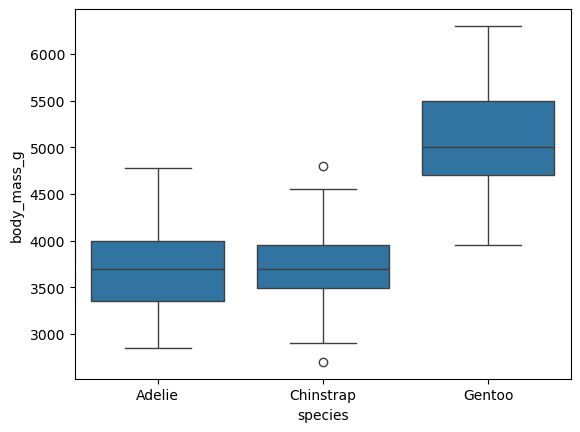

In [61]:
# Si queremos comparar distintos grupos de datos, podemos hacer boxplots para cada grupo
# Los mismos datos del histograma anterior, los representamos en un BoxPlot
sns.boxplot(data = penguins, x="species", y = "body_mass_g")
plt.show()

**Ejercicio.** ¿Qué conclusiones podemos sacar en base a este gráfico?

### Cantidad de pasajeros por año

<Axes: xlabel='year', ylabel='passengers'>

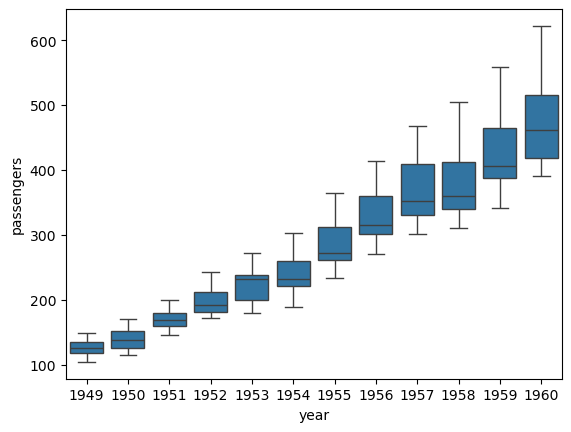

In [62]:
# También podemos representar la información de vuelos por mes utilizando boxplots.
sns.boxplot(data = flights, x = "year", y = "passengers")